*Structure*
>
>   - Git repo is available here: 
>   - "../code/" : .py scripts for data fetching:
>        * scrapAirbnb.py
>        * scrapSocrata.py
>   - "../data/" : raw collected data 
>   - "../explainerNoteboooks/": explanatory notebooks to ease of presentation:
>        * **Intro & Data preprocessing (current)**
>        * **Exploratory Analysis (current)**
>        * ML Correlations and Predictions

In [1]:
import sys  
sys.path.insert(0, '../code')
from __init__ import *

Import succesfull
Tokens and default var imported
Functions imported


# Intro & Data preprocessing

## Scope

- Show how to use APIs to scrape data
- Prepare appropriately Data for the analysis
- Apply explorative data analysis tools to capture interesting aspects of the choosen datases and uncover correlations between their variables
- Use data visualization tools for explicative data analysis

## Data and Context

Analyse San Francisco (CA) in terms of:
- Crime data, Socrata API
- Weather data, .csv file
- Rental data, RapidAPI

## Data Availability

Loads of data is reachable online, but not all scraping is strictly legal and most of monetizable content is behind a paywall.
The choice of the context is mainly dictated by what I had available pronto, namely the **weather data**, and what could be scraped with APIs without subscriptions. 

# Loading Raw Data

In [2]:
## CRIMES
#loading raw crime dataset 2013-2017
df_crime_20132017 = pd.read_pickle("../data/df_clean_results_20132017_raw.pkl") #df1
#loading raw crime dataset 2018-2020
df_crime_20182020 = pd.read_pickle("../data/df_clean_results_20182020_raw.pkl") #df2

#WEATHER
#loading weather information 2008-2020 
weather_data = pd.read_csv("../data/weather_data.csv") 

## AIRBNB
#loading airbnb information
df_airbnb = pd.read_pickle("../data/df_SFlistings.pkl")

# Data Preprocessing

## Crime datasets
* Until now the crime datasets have been only cleaned of superflous columns and 3 formatted column with "Date" , "hourOfDay" and "minuteOfDay" have been added as first
* The datasets for the rest are raw and not formatted.

We start by a general overview checking for column types, for the numerical ones we can have a look for outliers (min, max and mean of columns) and evaluate Nan values.

In [3]:
#overview
nanPos = overview(df_crime_20132017)

#peek
df_crime_20132017.head(5)

There are Nan values: False

STATISTICS
           hourOfDay    minuteOfDay
count  739448.000000  739448.000000
mean       13.469086      20.265666
std         6.516445      18.578896
min         0.000000       0.000000
25%         9.000000       0.000000
50%        14.000000      19.000000
75%        19.000000      33.000000
max        23.000000      59.000000

SERIE TYPES
Date             datetime64[ns]
hourOfDay                 int64
minuteOfDay               int64
pdid                     object
incidntnum               object
incident_code            object
category                 object
descript                 object
dayofweek                object
date                     object
time                     object
pddistrict               object
resolution               object
address                  object
x                        object
y                        object
Time             datetime64[ns]
dtype: object


,Date,hourOfDay,minuteOfDay,pdid,incidntnum,incident_code,category,descript,dayofweek,date,time,pddistrict,resolution,address,x,y,Time
1345018,2013-01-01,0,1,14089776564070,140897765,64070,SUSPICIOUS OCC,SUSPICIOUS OCCURRENCE,Tuesday,2013-01-01T00:00:00.000,00:01,PARK,NONE,1600 Block of EDDY ST,-122.434821446921,37.7811662982153,2021-04-01 00:01:00
1345019,2013-01-01,0,1,13109578809029,131095788,09029,OTHER OFFENSES,FALSE PERSONATION TO RECEIVE MONEY OR PROPERTY,Tuesday,2013-01-01T00:00:00.000,00:01,SOUTHERN,UNFOUNDED,0 Block of BAYSIDEVILLAGE PL,-122.3896594129,37.7848807205949,2021-04-01 00:01:00
1345020,2013-01-01,0,1,13094142910045,130941429,10045,EMBEZZLEMENT,"EMBEZZLEMENT, GRAND THEFT BY EMPLOYEE",Tuesday,2013-01-01T00:00:00.000,00:01,TENDERLOIN,NONE,400 Block of TURK ST,-122.416349428183,37.7825569563078,2021-04-01 00:01:00
1345021,2013-01-01,0,1,14012068568030,140120685,68030,NON-CRIMINAL,COURTESY REPORT,Tuesday,2013-01-01T00:00:00.000,00:01,INGLESIDE,UNFOUNDED,600 Block of SAWYER ST,-122.416044743184,37.7093308363683,2021-04-01 00:01:00
1345022,2013-01-01,0,1,14082354409029,140823544,09029,OTHER OFFENSES,FALSE PERSONATION TO RECEIVE MONEY OR PROPERTY,Tuesday,2013-01-01T00:00:00.000,00:01,INGLESIDE,NONE,200 Block of MONTEREY BL,-122.440906571765,37.731680654848,2021-04-01 00:01:00


In [4]:
#overview
nanPos = overview(df_crime_20182020)
#peek
df_crime_20182020.tail(5)

There are Nan values: True
[[11 'cad_number']
 [12 'cad_number']
 [13 'cad_number']
 ...
 [417060 'cad_number']
 [417099 'cad_number']
 [417100 'cad_number']]

STATISTICS
           hourOfDay    minuteOfDay
count  417114.000000  417114.000000
mean       13.135330      20.085950
std         6.421534      18.720803
min         0.000000       0.000000
25%         9.000000       0.000000
50%        14.000000      18.000000
75%        18.000000      34.000000
max        23.000000      59.000000

SERIE TYPES
Date                       datetime64[ns]
hourOfDay                           int64
minuteOfDay                         int64
incident_year                      object
incident_day_of_week               object
report_datetime                    object
row_id                             object
incident_id                        object
incident_number                    object
cad_number                         object
report_type_code                   object
report_type_description       

,Date,hourOfDay,minuteOfDay,incident_year,incident_day_of_week,report_datetime,row_id,incident_id,incident_number,cad_number,...,incident_subcategory,incident_description,resolution,intersection,cnn,police_district,analysis_neighborhood,supervisor_district,latitude,longitude
417109,2020-12-31,23,30,2020,Thursday,2021-01-11T14:48:00.000,99504806232,995048,210023622,210111991,...,Larceny - Auto Parts,"Theft, Vehicle Strip, $50-$200",Open or Active,04TH ST \ LONG BRIDGE ST,34168000,Southern,Mission Bay,6,37.773466920607476,-122.39143433652146
417110,2020-12-31,23,30,2020,Thursday,2021-01-04T16:52:00.000,99296805042,992968,210007654,210042387,...,Burglary - Residential,"Burglary, Residence, Att. Forcible Entry",Open or Active,18TH AVE \ KIRKHAM ST,27363000,Taraval,Inner Sunset,7,37.759879432848436,-122.47579656403286
417111,2020-12-31,23,34,2020,Thursday,2020-12-31T23:39:00.000,99193064020,991930,200791221,203663458,...,Other,Mental Health Detention,Open or Active,WELSH ST \ 05TH ST,23888000,Southern,South of Market,6,37.77737199450485,-122.39976258647586
417112,2020-12-31,23,39,2020,Thursday,2020-12-31T23:40:00.000,99191465015,991914,200791237,203663275,...,Other,"Driving, No License Issued",Cite or Arrest Adult,AL SCOMA WAY \ JEFFERSON ST,35066000,Central,North Beach,3,37.807978726080414,-122.417715898404
417113,2020-12-31,23,55,2020,Thursday,2021-01-01T00:24:00.000,99191304134,991913,210000034,210010091,...,Simple Assault,Battery,Cite or Arrest Adult,GEARY ST \ SHANNON ST,24962000,Central,Tenderloin,6,37.7868345113598,-122.41234030428764


The first df has no nan, but the second, "df_crime_20182020", has. 

Lets check where they are, how numerous, and if in columns that are needed for the analysis we drop the row. 
We also evaluate how much data we are dropping.

In [5]:
nanrows = [e[0] for e in nanPos]
nanCol = [e[1] for e in nanPos]
print (f"- Total num of nan values in df: {len(nanPos)}\n- Num of rows with nan values: {len(set(nanrows))}")
print (f"- Columns with nan values: {set(nanCol)}")

- Total num of nan values in df: 223104
- Num of rows with nan values: 95209
- Columns with nan values: {'analysis_neighborhood', 'incident_category', 'incident_subcategory', 'latitude', 'supervisor_district', 'cad_number', 'intersection', 'cnn', 'longitude'}


So more than 220k cells are nan, over more than 95k rows. 
The variables that we need per each row, among the ones having nans, are 'incident_category',latitude' and 'longitude'.
Lets check how many cells in these 3 columns are nans.

In [6]:
totNan = 0
for col in ['incident_category','latitude','longitude']:
    colNan = df_crime_20182020[col].isnull().sum()
    print (f"{col}:{colNan}")
    totNan += colNan

incident_category:318
latitude:21518
longitude:21518


So there are 318 crimes without an incident category reported and more than 20k without a location information.
We extract the rows indexes of these nan, to check that the indexes of nan values in lat and long are the same as it seems. Anyway given the large amount of date we decide to take only the rows where these values are given.

In [7]:
idx_cat = df_crime_20182020.loc[pd.isna(df_crime_20182020["incident_category"]), :].index
idx_lat = df_crime_20182020.loc[pd.isna(df_crime_20182020["latitude"]), :].index
idx_long = df_crime_20182020.loc[pd.isna(df_crime_20182020["longitude"]), :].index

assert all(idx_lat == idx_long)

In [8]:
df_crime_20182020_small = df_crime_20182020[df_crime_20182020[['incident_category','latitude']].notna().all(1)]

In [9]:
print (f"Percentage of rows retained after excluding some nans: {round(len(df_crime_20182020_small)/len(df_crime_20182020),2)}%")

Percentage of rows retained after excluding some nans: 0.95%


Now that the nans are solved we continue by checking on the consistency between the two crimes dataset in order to merge them. 
Apparently after mid 2018 they changed the way the crime information was collected.
Checking one crime in the overlapping period (early 2018) to validate the mapping.
>df_crime_20032018.iloc[2084603] is the same as >df_crime_20182020.iloc[195]

Here the variables kept and their mapping between the df1 <-> df2; mainly trying to uniform to var in the df1, but sometimes, like in the case of longitude and latitude, is clearer to adopt the naming from df2.
* "Date", same 
* "hourOfDay",same 
* "minuteOfDay",same
* "dayofweek" <- "incident_day_of_week"
* EXCLUDED"pdid" <- "incident_number"+("row_id"[len("incident_id"):])
    * >df_crime_20182020.incident_number[128] + df_crime_20182020.row_id[128][len(df_crime_20182020.incident_id[128]):]
* "category" <- "incident_category", since the data in df1 is more generic, we try to reduce to df1
* "description"<- "incident_description"
* "pddistrict" -> "police_district"
* "y" -> "latitude"
* "x" -> "longitude"

In [10]:
#select
df1_tidy = df_crime_20132017[['Date', 'dayofweek','hourOfDay', 'minuteOfDay','category', 'descript','pddistrict', 'x', 'y']]
#rename
df1 = df1_tidy.rename(columns = {'Date': 'date', 
                                 'dayofweek': 'dayofweek',
                                 'hourOfDay': 'hourOfDay',
                                 'minuteOfDay':'minuteOfDay',
                                 'category':'category',
                                 'descript':'description',
                                 'pddistrict': 'police_district',
                                 'y':'latitude',
                                 'x':'longitude'
                                }, inplace = False)
df1 = makeColLowerCase(df1,['category','description','police_district'])

#select
df2_tidy = df_crime_20182020_small[['Date', 'incident_day_of_week','hourOfDay', 'minuteOfDay','incident_category', 'incident_description','police_district', 'latitude', 'longitude']]
#rename
df2 = df2_tidy.rename(columns = {'Date': 'date', 
                                 'incident_day_of_week': 'dayofweek',
                                 'hourOfDay': 'hourOfDay',
                                 'minuteOfDay':'minuteOfDay',
                                 'incident_category':'category',
                                 'incident_description':'description',
                                 'police_district':'police_district',
                                 'latitude':'latitude',
                                 'longitude':'longitude'
                                }, inplace = False)

df2 = makeColLowerCase(df2,['category','description','police_district'])

Before concatenating df1 and df2 a check on which crime categories are existing in both datasets.


In [11]:
df1_crimes, df2_crimes= list(df1.category.unique()), list(df2.category.unique())
sharedcrimes,df1only_crimes,df2only_crimes = getIntAndExc(df1_crimes,df2_crimes)
calculatedpercentage = [getPerc(list(df1.category),df1only_crimes)+"%",
                        getPerc(list(df2.category),df2only_crimes)+"%",
                        getPerc(list(df1.category)+(list(df2.category)),sharedcrimes)+"%"
                        ]

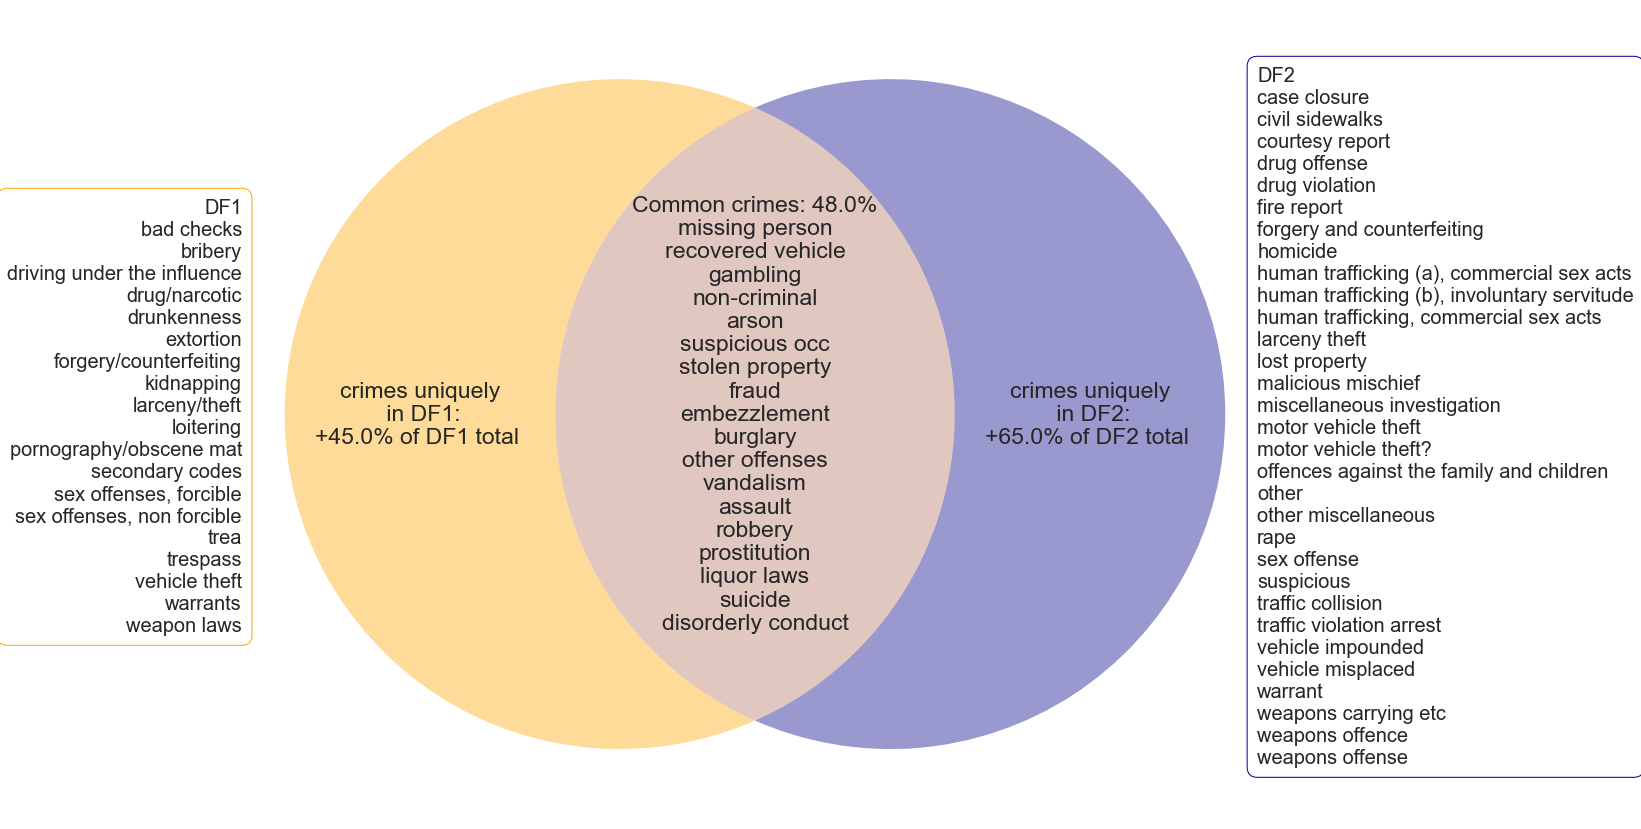

In [12]:
Venn2PlotMod(df1_crimes,df2_crimes,calculatedpercentage= calculatedpercentage,figsize=(30,15),fontsize=23)

45% of the first dataset and 65% of the second are in categories that are not common. 
That is a lot of lost data: we can do better.

We will be keeping the common ones plus mapping categories as follows: 
* 'vehicle theft' <- 'motor vehicle theft' and 'motor vehicle theft?'
* 'sex offenses, forcible' -> 'rape'
* 'sex offenses, non forcible'-> 'sex offens'
* 'drug/narcotic' <- 'drug offense', 'drug violation'
* 'larceny/theft' <- 'larceny theft'
* 'weapon laws <- 'weapons carrying etc', 'weapons offence', 'weapons offense'
* 'driving under the influence' <- 'traffic collision', 'traffic violation arrest'
* 'forgery/counterfeiting' <- 'forgery and counterfeiting'
* 'warrants' <- 'warrant'

Discarding from df1: 'bad checks', 'bribery','drunkenness','extortion','kidnapping', 'loitering', 'pornography/obscene mat', 'secondary codes', 'trea', 'trespass'.

Discarding from df2: 'case closure', 'civil sidewalks', 'courtesy report','fire report', 'homicide','human trafficking (a), commercial sex acts','human trafficking (b), involuntary servitude', 'human trafficking, commercial sex acts', 'larceny theft','lost property', 'malicious mischief','miscellaneous investigation', 'offences against the family and children', 'other','other miscellaneous', 'suspicious', 'vehicle impounded', 'vehicle misplaced'.

In [13]:
df1.replace({'sex offenses, forcible': 'rape', 
             'sex offenses, non forcible': 'sex offense',
            },
           inplace=True)

In [14]:
df2.replace({'motor vehicle theft': 'vehicle theft', 
             'motor vehicle theft?': 'vehicle theft',
             'drug offense':'drug/narcotic',
             'drug violation':'drug/narcotic',
             'larceny theft':'larceny/theft',
             'weapons carrying etc': 'weapon laws',
             'weapons offence': 'weapon laws', 
             'weapons offense': 'weapon laws',
             'forgery and counterfeiting':'forgery/counterfeiting',
             'traffic collision':'driving under the influence', 
             'traffic violation arrest':'driving under the influence',
             'warrant':'warrants',
            },
           inplace=True)

Lets see how things look like after the mapping:

In [15]:
df1_crimes, df2_crimes= list(df1.category.unique()), list(df2.category.unique())
sharedcrimes,df1only_crimes,df2only_crimes = getIntAndExc(df1_crimes,df2_crimes)
calculatedpercentage_after = [getPerc(list(df1.category),df1only_crimes)+"%",
                        getPerc(list(df2.category),df2only_crimes)+"%",
                        getPerc(list(df1.category)+(list(df2.category)),sharedcrimes)+"%"
                       ]

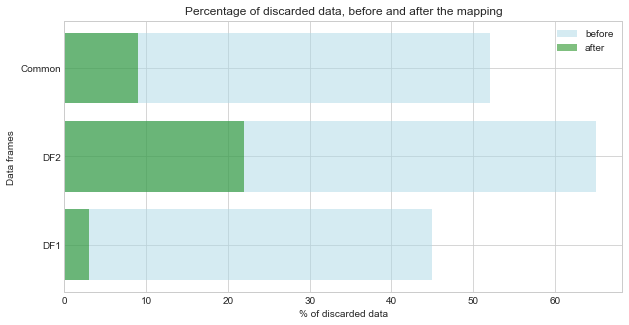

In [16]:
hBarPlot(calculatedpercentage,calculatedpercentage_after)

Now that amount of data discarded is much more limited, we can merge the two crime dataframes.
(note to self: would be interesting to see where human trafficking b) takes place... )

In [17]:
# select only rows with common crimes
df1_common = df1.query("category in @sharedcrimes")
df2_common = df2.query("category in @sharedcrimes")
#concatenate the two df
dfcomplete = pd.concat([df1_common, df2_common])

And add to the complete_df more variables that will be used and facilitate the analysis:
* numDayOfWeek
* hourOfWeek
* month
* year


In [18]:
df_tidy = formattingDF(dfcomplete,insertAt = 1)
#storing 
#df_tidy.to_pickle(f"../data/df_tidy.pkl")

../code/functions_df.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hourOfWeek'] = df["numDayOfWeek"]*24+df["hourOfDay"]


## Weather data

In [51]:
# load
sf_weather = pd.read_pickle("../data/sf_weather_clean_20082020_raw.pkl")
#overview
nanPos = overview(sf_weather)

There are Nan values: False

STATISTICS
        NumDayOfWeek      hourOfDay          tempC       humidity  \
count  109608.000000  109608.000000  109608.000000  109608.000000   
mean        2.999343      11.500000      15.211782      70.558043   
std         1.999626       6.922218       4.913455      16.819634   
min         0.000000       0.000000       1.000000      14.000000   
25%         1.000000       5.750000      12.000000      59.000000   
50%         3.000000      11.500000      15.000000      73.000000   
75%         5.000000      17.250000      18.000000      85.000000   
max         6.000000      23.000000      39.000000      99.000000   

          pressureMB       precipMM     cloudcover     HeatIndexC  \
count  109608.000000  109608.000000  109608.000000  109608.000000   
mean     1016.265336       0.049322      21.732392      15.459310   
std         4.800090       0.298665      28.075551       5.183072   
min       979.000000       0.000000       0.000000       1.000

No nan values and right columns formatting, lets try to visualize the main variables in time, to check if they look realistic (eg cyclicity of temperature and uvindex).

In [52]:
sf_weather["year"]= sf_weather.Date.dt.year
sf_weather = resetColumns(sf_weather,frompos = -1,insertAt=1)

sf_weather["month"]= sf_weather.Date.dt.month
sf_weather= resetColumns(sf_weather,frompos = -1,insertAt=1)

# this is an aggregate function different from Date
sf_weather["YM"] = pd.to_datetime(sf_weather[['year', 'month']].assign(DAY=1))
sf_weather= resetColumns(sf_weather,frompos = -1,insertAt=1)

In [56]:
#peek
sf_weather.head(5)

,Date,YM,month,year,NumDayOfWeek,hourOfDay,isdaytime,tempC,humidity,pressureMB,precipMM,cloudcover,HeatIndexC,uvIndex,windspeedKmph,winddirdegree,weatherDesc
0,2008-07-01,2008-07-01,7,2008,1,0,no,12,94,1016,0.0,47,12,1,6,267,Partly cloudy
1,2008-07-01,2008-07-01,7,2008,1,1,no,12,94,1016,0.0,45,12,1,7,266,Partly cloudy
2,2008-07-01,2008-07-01,7,2008,1,2,no,12,95,1016,0.1,43,12,1,8,265,Mist
3,2008-07-01,2008-07-01,7,2008,1,3,no,12,95,1016,0.0,41,12,1,9,264,Mist
4,2008-07-01,2008-07-01,7,2008,1,4,no,12,91,1016,0.0,48,12,1,8,262,Mist


We select the same time period as for the crime data:

In [57]:
def date2string(date, delta= None):
    if delta is None: 
        return pd.to_datetime(str(date)).strftime('%d/%m/%Y')
    else:
        return (pd.to_datetime(str(date))+datetime.timedelta(days=delta)).strftime('%d/%m/%Y') 
        

In [58]:
startdate= date2string(min(list(df_tidy.date.unique())))
finishdate = date2string(max(list(df_tidy.date.unique())),delta=1)

In [59]:
#mask 
sf_weather20132020 = maskDfbyDate(sf_weather,startdate, finishdate,date = "Date")

In [60]:
#store
#sf_weather20132020.to_pickle(f"../data/sf_weather20132020.pkl")

From a quick look this dataset looks fine. 

## Airbnb data

In [69]:
#loading 
df_airbnb = pd.read_pickle("../data/df_SFlistings.pkl")

#overview
nanPos = overview(df_airbnb)

#peek
df_airbnb.head(5)

There are Nan values: True
[[0 'amenities']
 [0 'reviews']
 [0 'url']
 ...
 [1134 'amenities']
 [1134 'reviews']
 [1134 'url']]

STATISTICS
                 id  night_priceـnative  night_price  weekly_price  \
count  1.135000e+03         1135.000000  1135.000000   1135.000000   
mean   2.915137e+07          264.769163   250.599119    261.722467   
std    1.010006e+03          321.204083   374.129155    776.600249   
min    2.914998e+07           10.000000    10.000000      0.000000   
25%    2.915063e+07          120.000000   115.000000      0.000000   
50%    2.915115e+07          172.000000   161.000000      0.000000   
75%    2.915184e+07          285.000000   260.000000      0.000000   
max    2.915636e+07         4550.000000  9000.000000   7500.000000   

       monthly_price  cleaning_fee_native  num_of_baths  num_of_rooms  \
count    1135.000000          1071.000000   1135.000000   1133.000000   
mean      910.592952           135.627451      1.418502      1.829656   
std      2

,id,property_id,source,status,night_priceـnative,night_price,weekly_price,monthly_price,cleaning_fee_native,num_of_baths,...,reviews_count,start_rating,reviews,created_at,updated_at,num_of_beds,lat,lon,image,url
0,29150571,10058059,Airbnb,ACTIVE,175,160,0,0,250.0,1.0,...,39,5.0,None,2021-03-30T12:29:25.000Z,2021-03-30T12:29:25.000Z,1.0,37.7530,-122.440,https://a0.muscache.com/im/pictures/b537fcf0-4...,None
1,29150583,10058568,Airbnb,ACTIVE,375,428,0,6500,160.0,2.0,...,42,5.0,None,2021-03-30T12:29:26.000Z,2021-03-30T12:29:26.000Z,2.0,37.7689,-122.447,page3/v3/room_default_no_photos.png,None
2,29150843,10071349,Airbnb,ACTIVE,80,88,0,0,125.0,1.0,...,14,5.0,None,2021-03-30T12:29:59.000Z,2021-03-30T12:29:59.000Z,1.0,37.7909,-122.417,https://a0.muscache.com/im/pictures/39c5aa8a-d...,None
3,29150853,1007157,Airbnb,ACTIVE,230,224,0,7000,150.0,1.0,...,90,5.0,None,2021-03-30T12:30:00.000Z,2021-03-30T12:30:00.000Z,4.0,37.7959,-122.418,https://a0.muscache.com/im/pictures/18571424/3...,None
4,29150465,10089183,Airbnb,ACTIVE,116,125,0,0,75.0,1.0,...,134,5.0,None,2021-03-30T12:29:11.000Z,2021-03-30T12:29:11.000Z,1.0,37.7748,-122.425,https://a0.muscache.com/im/pictures/09809b8e-1...,None


Again nan types, in this case we have many less inputs (1135) so better be careful before discarding any.

In [70]:
nanrows = [e[0] for e in nanPos]
nanCol = [e[1] for e in nanPos]
print (f"- Total num of nan values in df: {len(nanPos)}\n- Num of rows with nan values: {len(set(nanrows))}")
print (f"- Columns with nan values: {set(nanCol)}")

- Total num of nan values in df: 3496
- Num of rows with nan values: 1135
- Columns with nan values: {'amenities', 'num_of_beds', 'num_of_rooms', 'cleaning_fee_native', 'start_rating', 'url', 'airbnb_neighborhood', 'reviews', 'zip'}


Each row has at least one nan!
Looking at the columns we can say that:
* we can live without details such as 'amenities', 'zip', 'num_of_beds', 'cleaning_fee_native', 'reviews', 'url', 'num_of_rooms', 'start_rating'. so that rows with nan values in this columns can be kept for now (maybe later on will change our mind on this) 

* 'airbnb_neighborhood',this sounds like a variable that we want to keep,lets check if it is the categorical of  "airbnb_neighborhood_id" so lets try to map one to the other...

In [71]:
dfgroup = df_airbnb.groupby(["airbnb_neighborhood_id","airbnb_neighborhood"]).size().unstack(level=0)
#dfgroup

From the matrix above "dfgroup" we realize that several "airbnb_neighborhood_id" can correspond to the same 'airbnb_neighborhood' and viceversa, therefore no 1:1 mapping is possible.
lets check how many rows lack the airbnb_neighborhood value.

In [72]:
idx_neig = df_airbnb.loc[pd.isna(df_airbnb["airbnb_neighborhood"]), :].index
len(idx_neig)

3

Only 3 rows to drop, so we execute. 

In [73]:
df_airbnb_small = df_airbnb[df_airbnb['airbnb_neighborhood'].notna()]

Lets reduce dimensionality, removing redundant and un interesting columns. 

In [74]:
df_airbnb_small.airbnb_neighborhood.unique()

array(['Noe Valley', 'Haight-Ashbury', 'Nob Hill', 'Hayes Valley',
       'Mission District', 'Potrero Hill', 'The Castro',
       'Richmond District', 'Daly City', 'Excelsior', 'Russian Hill',
       'Inner Sunset', 'Downtown', 'Bernal Heights',
       'Western Addition/NOPA', 'Lower Haight', 'Bayview',
       'Balboa Terrace', 'Duboce Triangle', 'Cole Valley', 'Outer Sunset',
       'Diamond Heights', 'Glen Park', 'Ingleside', 'Financial District',
       'SoMa', 'Parkside', 'Telegraph Hill', 'Marina', 'Dogpatch',
       'Visitacion Valley', 'Sunnyside', 'Cow Hollow', 'Civic Center',
       'Crocker Amazon', "Fisherman's Wharf", 'Lakeshore', 'Tenderloin',
       'Oceanview', 'Twin Peaks', 'Mission Terrace', 'Chinatown',
       'Portola', 'South Beach', 'Pacific Heights', 'Sea Cliff',
       'Forest Hill', 'North Beach', 'Presidio Heights', 'West Portal',
       'Alamo Square', 'Presidio', 'Union Square'], dtype=object)

In [75]:
df_airbnb_small= df_airbnb_small[['id', 'property_id','url',
                                 'name','lat', 'lon',
                                 'night_price', 'cleaning_fee_native',
                                 'capacity_of_people','property_type', 'start_rating'
                                ]]

In [76]:
df_airbnb_small.describe()

,id,lat,lon,night_price,cleaning_fee_native,capacity_of_people,start_rating
count,1.132000e+03,1132.000000,1132.000000,1132.000000,1068.000000,1132.000000,1120.000000
mean,2.915136e+07,37.758955,-122.440397,250.593640,135.661985,4.393993,4.973214
std,9.992377e+02,0.027690,0.029658,374.620639,97.705921,2.611658,0.172239
min,2.914998e+07,37.697800,-122.509000,10.000000,0.000000,1.000000,3.000000
25%,2.915063e+07,37.741050,-122.462000,115.000000,75.000000,2.000000,5.000000
50%,2.915115e+07,37.762350,-122.436500,161.000000,110.000000,4.000000,5.000000
75%,2.915184e+07,37.778300,-122.417000,260.000000,175.000000,6.000000,5.000000
max,2.915636e+07,37.807300,-122.371000,9000.000000,1350.000000,16.000000,5.000000


In [77]:
#storing 
#df_airbnb_small.to_pickle(f"../data/df_airbnb_small.pkl")

With this the data preprocessing is closed. 